In [411]:
import numpy as np
import matplotlib.pyplot as plt

# **Ejercicio 3**

In [9]:
users_idx = np.array([15, 12, 14, 10, 1, 2, 1], dtype = 'uint8')
users_id = np.array(np.arange(0, len(users_idx)), dtype = 'uint8')

In [12]:
print('Identificadores de usuarios: ' + str(users_idx))
print('Índices de usuarios: ' + str(users_id))

Identificadores de usuarios: [15 12 14 10  1  2  1]
Índices de usuarios: [0 1 2 3 4 5 6]


In [42]:
class indexing(object):
    def __new__ (cls, identificadores):
        print("_new_")
        return super(indexing, cls).__new__(cls)
    
    def __init__ (self, identificadores):
        self.ids = identificadores
        self.index = np.arange(0, len(identificadores))
        print("_init_")
        
    def get_user_id(self, user_index):
        if user_index < len(self.ids):
            return self.ids[user_index]
        else: print("ERROR: El índice solicitado esta fuera del rango de usuarios")
    def get_user_index(self, user_id):
        if user_id in self.ids:
            return self.index[np.where(self.ids == user_id)]
        else: print("ERROR: El ID solicitado no se encuentra en la lista de usuarios")
        

In [43]:
clase_1 = indexing(np.array([0, 5, 6, 8]))

_new_
_init_


In [29]:
print(clase_1.ids)

[0 5 6 8]


In [30]:
print(clase_1.index)

[0 1 2 3]


In [44]:
indice = 3
print("Con el índice: " + str(indice) + " el identificador es: " + str(clase_1.get_user_id(indice)))

Con el índice: 3 el identificador es: 8


In [48]:
clase_1.get_user_id(4000)

ERROR: El índice solicitado esta fuera del rango de usuarios


In [45]:
identificador = 8
print("Con el identificador: " + str(identificador) + " el índice es: " + str(clase_1.get_user_index(identificador)))

Con el identificador: 8 el índice es: [3]


In [40]:
clase_1.get_user_index(20)

El ID solicitado no se encuentra en la lista de usuarios


# **Ejercicio 4**

In [21]:
def calc_TP(truth, prediction):
    return np.sum(truth & prediction)

def calc_TN(truth, prediction):
    return len(truth) - np.sum(truth | prediction)

def calc_FP(truth, prediction):
    return np.sum((T != P) & P)

def calc_FN(truth, prediction):
    return np.sum((T != P) & T)

def calc_precision(truth, prediction):
    TP = calc_TP(truth, prediction)
    FP = calc_FP(truth, prediction)
    return TP/(TP + FP)

def calc_recall(truth, prediction):
    TP = calc_TP(truth, prediction)
    FN = calc_FN(truth, prediction)
    return TP/(TP + FN)

def calc_accuracy(truth, prediction):
    TP = calc_TP(truth, prediction)
    TN = calc_TN(truth, prediction)
    FP = calc_FP(truth, prediction)
    FN = calc_FN(truth, prediction)
    return (TP + TN)/(TP + TN + FP + FN)

In [14]:
T = np.array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1])
P = np.array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0])

In [15]:
calc_TP(T,P)

3

In [16]:
calc_TN(T,P)

1

In [17]:
calc_FP(T,P)

3

In [18]:
calc_FN(T,P)

3

In [20]:
calc_precision(T,P)

0.5

In [22]:
calc_recall(T,P)

0.5

In [23]:
calc_accuracy(T,P)

0.4

# Ejercicio 6

In [143]:
def distance(x1, x2):
    return np.sum(( x1 - x2 ) ** 2, axis = -1) ** 0.5

In [136]:
X = np.reshape(np.arange(1,10), (3,3))
C = np.array([[1, 0, 0], [0, 1, 1]])

In [137]:
print(X)
print(C)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 0 0]
 [0 1 1]]


In [138]:
C2 = C.reshape((2, 1, 3))

In [140]:
X.shape

(3, 3)

In [141]:
C2.shape

(2, 1, 3)

In [146]:
distance(X,C2)

array([[ 3.60555128,  8.36660027, 13.45362405],
       [ 2.44948974,  7.54983444, 12.72792206]])

# Ejercicio 7

In [332]:
def cluster_clas(points, centroids):
    
    C_r = centroids.reshape((centroids.shape[0], 1, centroids.shape[1]))
    dist = distance(points, C_r)
    
    return np.argmin(dist, axis = 0)    

In [178]:
cluster_clas(X,C)

array([1, 1, 1], dtype=int64)

# Ejercicio 8

In [337]:
X = np.reshape(np.arange(1,31), (10, 3))
X.shape[1]

3

In [459]:
def k_means(points, n_clusters):
    centroids = points[np.random.choice(np.arange(0, len(points)), n_clusters, replace = False)]
    for i in np.arange(0,5):
        labels = cluster_clas(points, centroids)
        clusters = np.concatenate((points , labels.reshape(len(points[:,0]),1)), axis = -1)
        
        for i in np.unique(labels):       
            centroids [i] = np.average(clusters[clusters[:,-1]==i][:,0:-1], axis = 0)
          
    return clusters, centroids

In [338]:
X

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15],
       [16, 17, 18],
       [19, 20, 21],
       [22, 23, 24],
       [25, 26, 27],
       [28, 29, 30]])

In [399]:
aux = k_means(X,2)

[[ 1  2  3  1]
 [ 4  5  6  1]
 [ 7  8  9  1]
 [10 11 12  0]
 [13 14 15  0]
 [16 17 18  0]
 [19 20 21  0]
 [22 23 24  0]
 [25 26 27  0]
 [28 29 30  0]]
[[ 1  2  3  0]
 [ 4  5  6  0]
 [ 7  8  9  0]
 [10 11 12  0]
 [13 14 15  0]
 [16 17 18  0]
 [19 20 21  0]
 [22 23 24  0]
 [25 26 27  0]
 [28 29 30  0]]
[[ 1  2  3  0]
 [ 4  5  6  1]
 [ 7  8  9  1]
 [10 11 12  1]
 [13 14 15  1]
 [16 17 18  1]
 [19 20 21  1]
 [22 23 24  1]
 [25 26 27  1]
 [28 29 30  1]]
[[ 1  2  3  0]
 [ 4  5  6  0]
 [ 7  8  9  0]
 [10 11 12  0]
 [13 14 15  0]
 [16 17 18  0]
 [19 20 21  0]
 [22 23 24  0]
 [25 26 27  0]
 [28 29 30  0]]
[[ 1  2  3  0]
 [ 4  5  6  0]
 [ 7  8  9  0]
 [10 11 12  1]
 [13 14 15  1]
 [16 17 18  1]
 [19 20 21  1]
 [22 23 24  1]
 [25 26 27  1]
 [28 29 30  1]]


C:\Users\alexb\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\alexb\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


# Genero un data set sintético a partir de N puntos aleatorios

In [ ]:
def clusters_synth_gen(n_clusters, var, random_seed):
    clusters = np.array
    for i in 

In [400]:
centroid = np.random.rand(1, 3)

In [435]:
cluster_synth1 = np.random.normal(0,0.65,(500,2)) + np.array([5, 5])
cluster_synth2 = np.random.normal(0,0.65,(500,2)) + np.array([3, 3])
clusters_synth = np.concatenate((cluster_synth1, cluster_synth2), axis = 0)

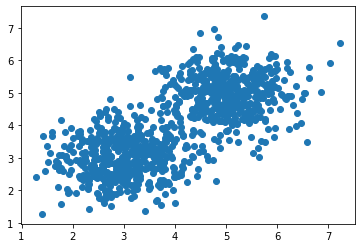

In [436]:
plt.scatter(clusters_synth[:,0], clusters_synth[:,1])

In [457]:
aux = k_means(clusters_synth,2)

[[2.92569796 4.21331827]
 [2.62744278 2.00630796]]
0
1
[[4.42955419 4.52598752]
 [2.89953353 2.53143913]]
0
1
[[4.90137885 4.86429062]
 [2.92652457 2.91181203]]
0
1
[[5.02091486 4.96896194]
 [2.9999712  2.998265  ]]
0
1
[[5.04051886 4.98690518]
 [3.01676107 3.01579677]]
0
1


In [443]:
aux[20:]

array([[4.41646882, 4.52260735, 0.        ],
       [4.73320461, 5.56384941, 0.        ],
       [5.13107213, 5.93667815, 0.        ],
       ...,
       [3.56901004, 2.54342664, 0.        ],
       [2.18811969, 3.4807299 , 0.        ],
       [2.99120111, 2.65889867, 0.        ]])

Text(0, 0.5, 'V2')

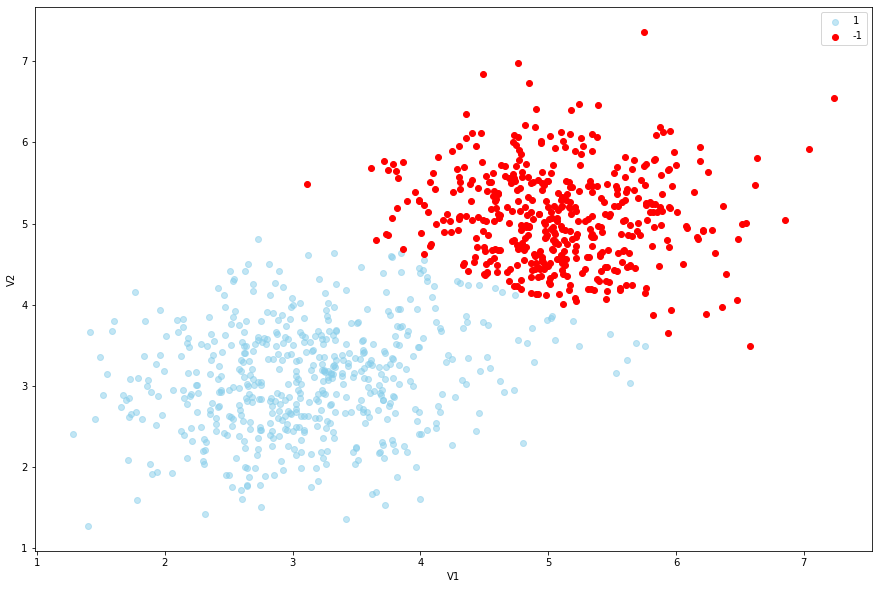

In [455]:
fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(aux[aux[:,-1]==0][:,0], aux[aux[:,-1]==0][:,1], alpha=0.5, c='skyblue', label='1')
ax.scatter(aux[aux[:,-1]==1][:,0], aux[aux[:,-1]==1][:,1], c='red', label='-1')
  

ax.legend()

ax.set_xlabel('V1')
ax.set_ylabel('V2')

Text(0, 0.5, 'V2')

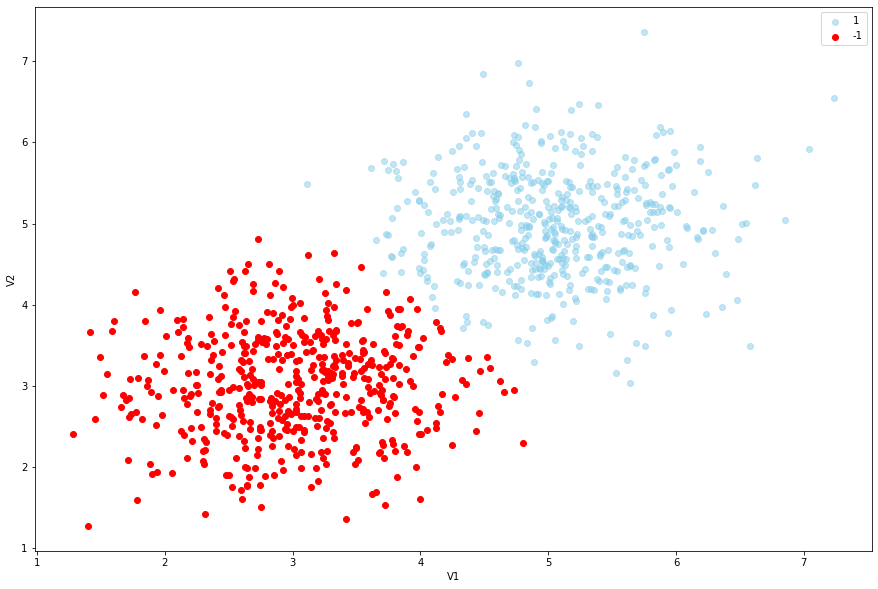

In [458]:
fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(aux[aux[:,-1]==0][:,0], aux[aux[:,-1]==0][:,1], alpha=0.5, c='skyblue', label='1')
ax.scatter(aux[aux[:,-1]==1][:,0], aux[aux[:,-1]==1][:,1], c='red', label='-1')
  

ax.legend()

ax.set_xlabel('V1')
ax.set_ylabel('V2')